<a href="https://colab.research.google.com/github/tamer017/ML-Assessments/blob/master/Hierarchal_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchal Clustering

Running this project require the following imports 

In [28]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from sklearn.decomposition import PCA
import plotly.express as px
from scipy.spatial.distance import cdist
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from scipy.stats import normaltest, zscore
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from operator import itemgetter
%matplotlib inline

In [2]:

plt.figure(figsize=(16,8))
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X, method = [], num_clusters = 0,kmean = False):
    # color = ["blue","orange","green","red","purple","brown","pink","gray","olive","cyan","yellow","black","lime","magenta"]  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
      sns.scatterplot(X[:, 0], X[:, 1], hue=np.zeros((X.shape[0],)), legend='full',palette="Set1")  
    else:
      labels = method.labels_
      if (num_clusters > 45):
        sns.scatterplot(X[:, 0], X[:, 1], hue=labels,palette="Set1").legend_.remove() 
      else: 
        sns.scatterplot(X[:, 0], X[:, 1], hue=labels, legend='auto',palette="Set1")  
        # plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,ncol=3)
      if (kmean):
        for i in range(num_clusters):
            plt.scatter(method.cluster_centers_[i][0], method.cluster_centers_[i][1], c = "black", marker = 'x', s = 100)   
    plt.show()
  
          

<Figure size 1152x576 with 0 Axes>

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [18]:
def Agglomerative_clustering(X, affinities = ['euclidean', 'manhattan', 'cosine'],linkages = ['average', 'single'],distance_thresholds = [3,5,10,1,9,4],no_dendograms = False):
  # Initialize variables to store best results
  best_silhouette_score = -1
  best_params = {}

  # Loop over all parameter combinations and perform clustering
  for affinity in affinities:
      for linkage_method in linkages:
          for distance_threshold in distance_thresholds:
              # Initialize model with current parameters
              model = AgglomerativeClustering(n_clusters=None, 
                                              affinity=affinity, 
                                              linkage=linkage_method,
                                              distance_threshold=distance_threshold)
              model.fit(X)
              n_clusters = np.unique(model.labels_).shape[0]
             
              if (n_clusters > 1):
                # Calculate the silhouette score
                silhouette_avg = silhouette_score(X, model.labels_)
                print("The number of clusters is :",np.unique(model.labels_).shape[0],"clusters",f"with silhouette score : {silhouette_avg:.2f}")
                print(f"Affinity: {affinity}, Linkage: {linkage_method}, Distance Threshold: {distance_threshold}")
                print(f"Silhouette Score: {silhouette_avg:.2f}")
                if(n_clusters <= 20):
                  print(pd.DataFrame(model.labels_).value_counts(normalize = True)*100)
                else:
                  print(pd.DataFrame(model.labels_).iloc[:10].value_counts(normalize = True)*100)
                  print(pd.DataFrame(model.labels_).iloc[-10:].value_counts(normalize = True)*100)

                # If the current score is better than the previous best score, update the variables
                if silhouette_avg > best_silhouette_score:
                    best_silhouette_score = silhouette_avg
                    best_params = {'affinity': affinity, 'linkage': linkage_method, 'distance_threshold': distance_threshold,"nuber of clusters" : n_clusters}
                if X.shape[1] == 2:
                  display_cluster(X, method = model, num_clusters = n_clusters)
                # Plot the dendrogram
                if(no_dendograms == False):
                  linkage_matrix = linkage(model.children_, method=linkage_method)
                  plt.figure(figsize=(12, 5))
                  plt.title(f"Dendrogram ({affinity}, {linkage_method})\nSilhouette Score: {silhouette_avg:.2f}")
                  dendrogram(linkage_matrix,)
                  plt.show()
              else:
                print("distance threshold :",distance_threshold,", linkage methode :",linkage_method,", and affinity :",affinity,"produces only one cluster")
      
              print("-----------------------------------------------------------------------------------------------------")

  print(f"\nBest Silhouette Score: {best_silhouette_score:.2f}")
  print(f"Best Parameters: {best_params}")
  return best_silhouette_score, best_params


## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



In [19]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
# display_cluster(Multi_blob_Data)

The number of clusters is : 16 clusters with silhouette score : 0.36
Affinity: euclidean, Linkage: average, Distance Threshold: 3
Silhouette Score: 0.36
8     25.172414
0     18.206897
1     18.206897
15    10.000000
6      8.275862
5      6.965517
13     5.793103
3      3.448276
2      0.827586
4      0.758621
12     0.758621
11     0.689655
7      0.551724
9      0.206897
10     0.068966
14     0.068966
dtype: float64


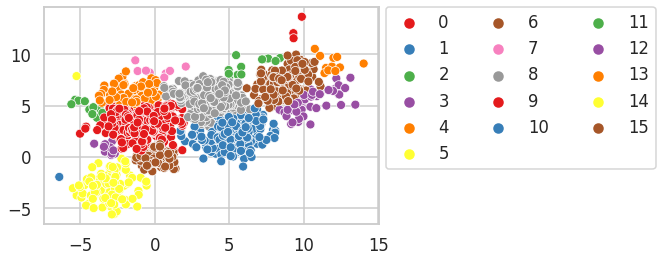

-----------------------------------------------------------------------------------------------------
The number of clusters is : 5 clusters with silhouette score : 0.43
Affinity: euclidean, Linkage: average, Distance Threshold: 5
Silhouette Score: 0.43
2    43.379310
3    25.310345
0    17.793103
1    13.310345
4     0.206897
dtype: float64


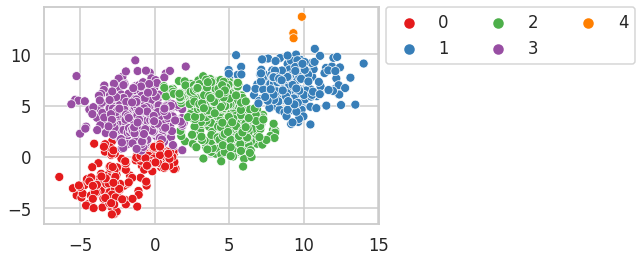

-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : average , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 115 clusters with silhouette score : 0.32
Affinity: euclidean, Linkage: average, Distance Threshold: 1
Silhouette Score: 0.32
112    20.0
17     10.0
23     10.0
28     10.0
49     10.0
84     10.0
89     10.0
95     10.0
96     10.0
dtype: float64
31    30.0
1     10.0
7     10.0
11    10.0
19    10.0
54    10.0
76    10.0
93    10.0
dtype: float64


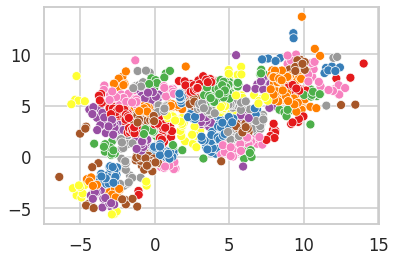

-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : average , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 10 clusters with silhouette score : 0.37
Affinity: euclidean, Linkage: average, Distance Threshold: 4
Silhouette Score: 0.37
8    25.172414
2    24.551724
7    18.206897
1    11.724138
5    10.758621
0     7.034483
6     0.827586
3     0.758621
4     0.758621
9     0.206897
dtype: float64


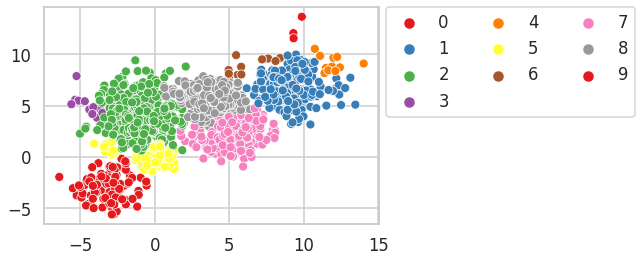

-----------------------------------------------------------------------------------------------------
distance threshold : 3 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 5 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 9 clusters with silhouette score : -0.15
Affinity: euclidean, Linkage: single, Distance Threshold: 1
Silhouette Score: -0.15
0    99.379310
1     0.137931
2     0.068966
3     0.068966
4     0.068966
5     0.068966
6     0.068966
7     0.068966
8     0.0

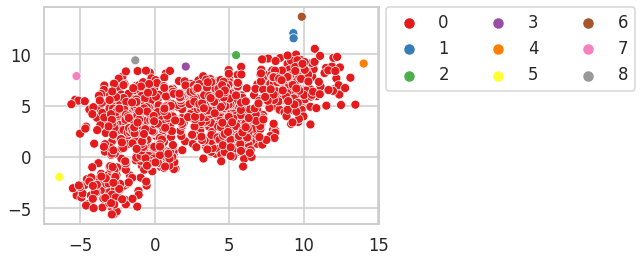

-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 4 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 25 clusters with silhouette score : 0.30
Affinity: manhattan, Linkage: average, Distance Threshold: 3
Silhouette Score: 0.30
0    80.0
9    20.0
dtype: float64
16    30.0
1     10.0
2     10.0
5     10.0
6     10.0
7     10.0
8     10.0
20    10.0
dtype: float64


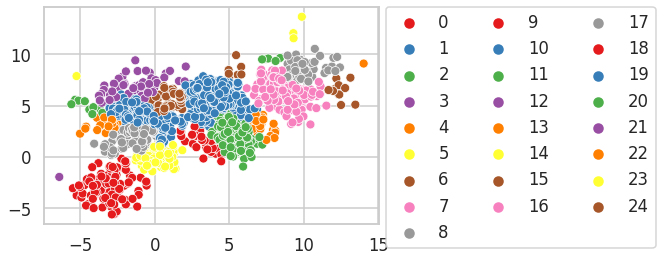

-----------------------------------------------------------------------------------------------------
The number of clusters is : 9 clusters with silhouette score : 0.40
Affinity: manhattan, Linkage: average, Distance Threshold: 5
Silhouette Score: 0.40
0    27.172414
4    24.896552
7    17.655172
8    12.000000
6    10.137931
1     7.034483
3     0.827586
2     0.206897
5     0.068966
dtype: float64


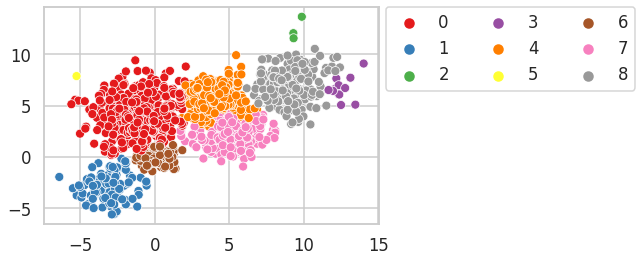

-----------------------------------------------------------------------------------------------------
The number of clusters is : 2 clusters with silhouette score : 0.47
Affinity: manhattan, Linkage: average, Distance Threshold: 10
Silhouette Score: 0.47
1    55.586207
0    44.413793
dtype: float64


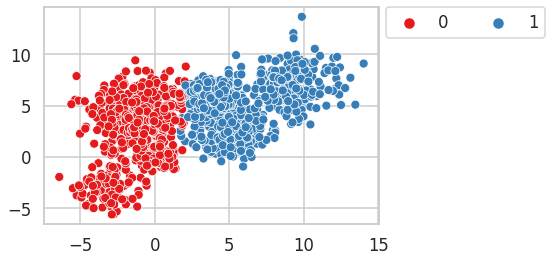

-----------------------------------------------------------------------------------------------------
The number of clusters is : 166 clusters with silhouette score : 0.34
Affinity: manhattan, Linkage: average, Distance Threshold: 1
Silhouette Score: 0.34
6      10.0
13     10.0
18     10.0
36     10.0
39     10.0
64     10.0
85     10.0
116    10.0
127    10.0
134    10.0
dtype: float64
24     30.0
4      10.0
5      10.0
68     10.0
97     10.0
135    10.0
154    10.0
160    10.0
dtype: float64


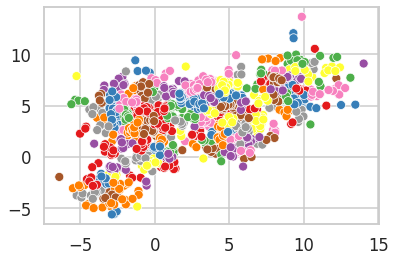

-----------------------------------------------------------------------------------------------------
The number of clusters is : 3 clusters with silhouette score : 0.41
Affinity: manhattan, Linkage: average, Distance Threshold: 9
Silhouette Score: 0.41
1    55.586207
0    44.344828
2     0.068966
dtype: float64


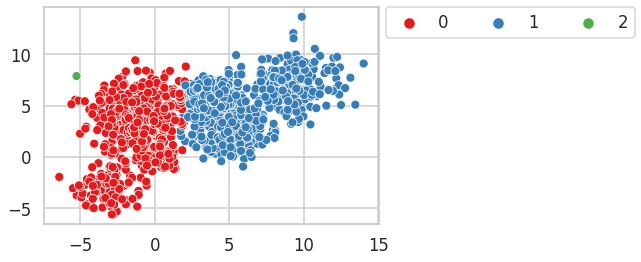

-----------------------------------------------------------------------------------------------------
The number of clusters is : 16 clusters with silhouette score : 0.33
Affinity: manhattan, Linkage: average, Distance Threshold: 4
Silhouette Score: 0.33
9     24.413793
3     17.655172
1     16.000000
14    10.137931
0      8.275862
4      6.965517
2      6.896552
8      3.862069
7      3.724138
15     0.758621
6      0.482759
12     0.413793
5      0.206897
10     0.068966
11     0.068966
13     0.068966
dtype: float64


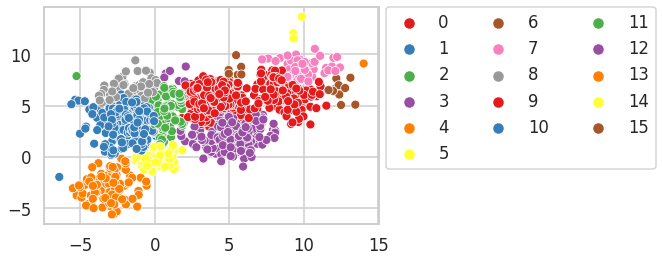

-----------------------------------------------------------------------------------------------------
distance threshold : 3 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 5 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 16 clusters with silhouette score : -0.41
Affinity: manhattan, Linkage: single, Distance Threshold: 1
Silhouette Score: -0.41
1     98.551724
3      0.275862
0      0.137931
2      0.137931
5      0.137931
4      0.068966
6      0.068966
7      0.068966


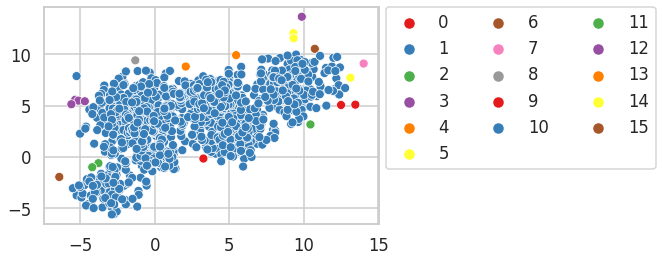

-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 4 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 3 , linkage methode : average , and affinity : cosine produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 5 , linkage methode : average , and affinity : cosine produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : average , and affinity : cosine produc

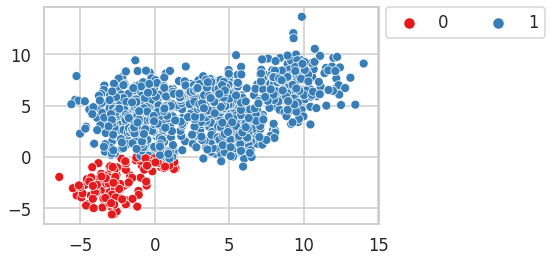

-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : average , and affinity : cosine produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 4 , linkage methode : average , and affinity : cosine produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 3 , linkage methode : single , and affinity : cosine produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 5 , linkage methode : single , and affinity : cosine produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : single , and affinity : cosine produces only

(0.46762361386512785,
 {'affinity': 'manhattan',
  'linkage': 'average',
  'distance_threshold': 10,
  'nuber of clusters': 2})

In [37]:
Agglomerative_clustering(Multi_blob_Data,no_dendograms = True)

# The number of clusters is : 2 clusters with silhouette score : 0.47
# Affinity: manhattan, Linkage: average, Distance Threshold: 10
# Silhouette Score: 0.47
# 1    55.586207
# 0    44.413793

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

In [21]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

The number of clusters is : 2 clusters with silhouette score : 0.69
Affinity: euclidean, Linkage: average, Distance Threshold: 3
Silhouette Score: 0.69
0    66.666667
1    33.333333
dtype: float64


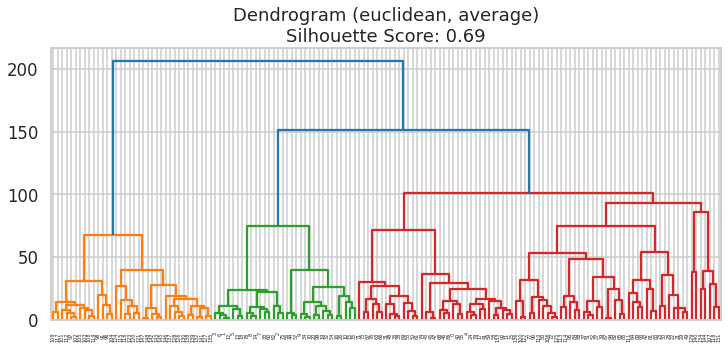

-----------------------------------------------------------------------------------------------------
distance threshold : 5 , linkage methode : average , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : average , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 10 clusters with silhouette score : 0.31
Affinity: euclidean, Linkage: average, Distance Threshold: 1
Silhouette Score: 0.31
4    30.000000
2    24.666667
0    16.000000
3    14.666667
6     6.000000
7     2.666667
8     2.666667
1     2.000000
5     0.666667
9     0.666667
dtype: float64


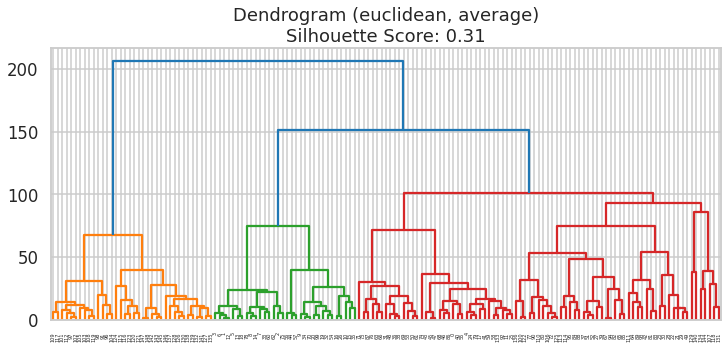

-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : average , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 2 clusters with silhouette score : 0.69
Affinity: euclidean, Linkage: average, Distance Threshold: 4
Silhouette Score: 0.69
0    66.666667
1    33.333333
dtype: float64


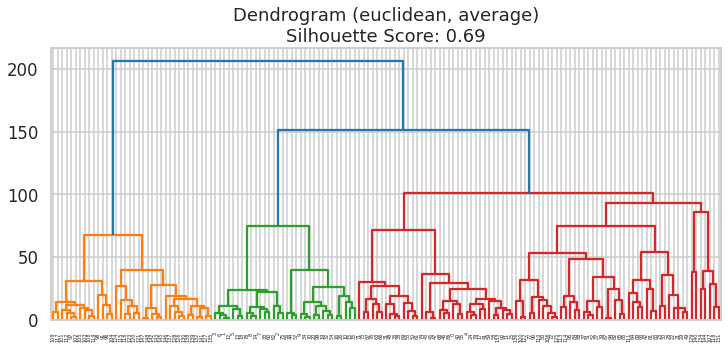

-----------------------------------------------------------------------------------------------------
distance threshold : 3 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 5 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 2 clusters with silhouette score : 0.69
Affinity: euclidean, Linkage: single, Distance Threshold: 1
Silhouette Score: 0.69
0    66.666667
1    33.333333
dtype: float64


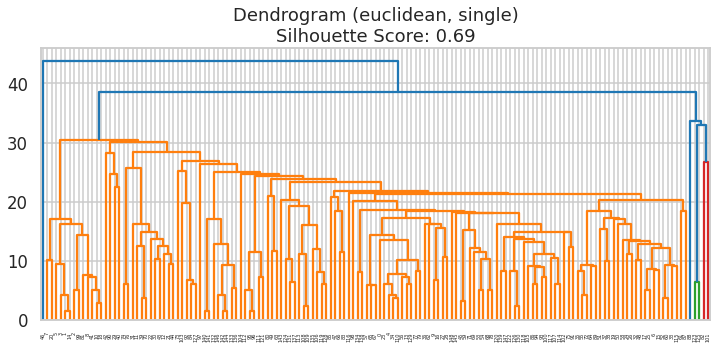

-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 4 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 4 clusters with silhouette score : 0.47
Affinity: manhattan, Linkage: average, Distance Threshold: 3
Silhouette Score: 0.47
2    39.333333
1    33.333333
0    24.666667
3     2.666667
dtype: float64


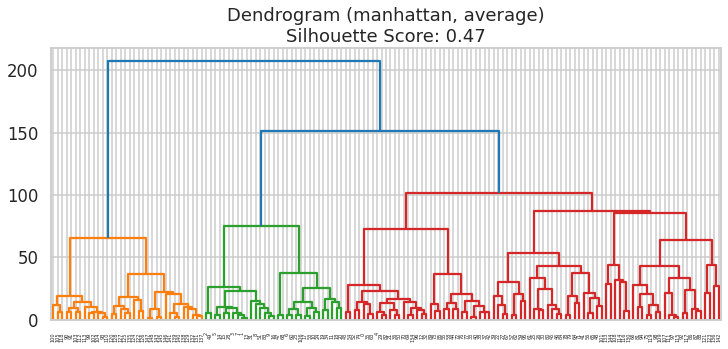

-----------------------------------------------------------------------------------------------------
The number of clusters is : 2 clusters with silhouette score : 0.69
Affinity: manhattan, Linkage: average, Distance Threshold: 5
Silhouette Score: 0.69
0    66.666667
1    33.333333
dtype: float64


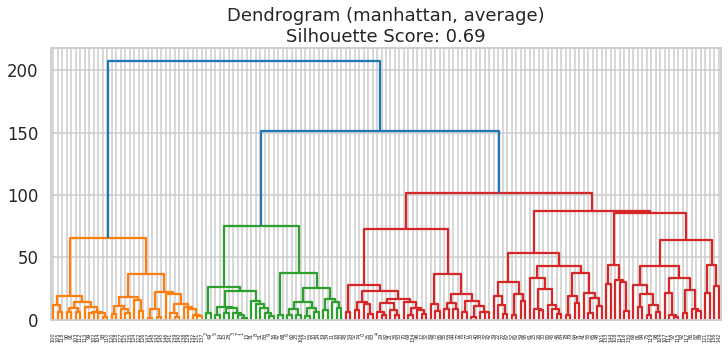

-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : average , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 28 clusters with silhouette score : 0.26
Affinity: manhattan, Linkage: average, Distance Threshold: 1
Silhouette Score: 0.26
10    60.0
11    30.0
6     10.0
dtype: float64
21    50.0
3     20.0
8     10.0
13    10.0
24    10.0
dtype: float64


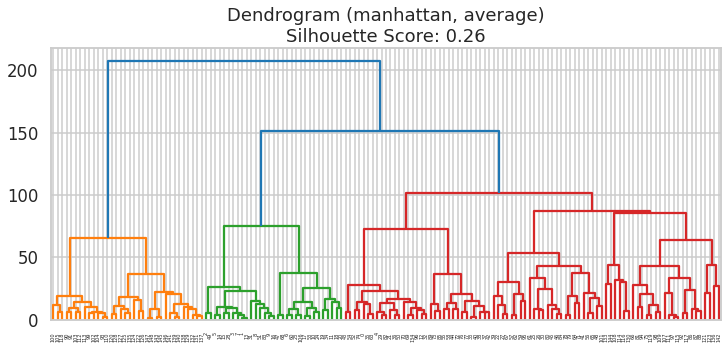

-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : average , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 2 clusters with silhouette score : 0.69
Affinity: manhattan, Linkage: average, Distance Threshold: 4
Silhouette Score: 0.69
0    66.666667
1    33.333333
dtype: float64


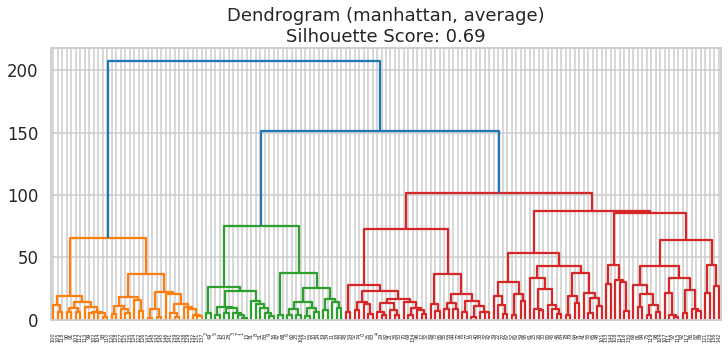

-----------------------------------------------------------------------------------------------------
distance threshold : 3 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 5 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 7 clusters with silhouette score : 0.15
Affinity: manhattan, Linkage: single, Distance Threshold: 1
Silhouette Score: 0.15
0    60.666667
1    33.333333
2     2.666667
4     1.333333
3     0.666667
5     0.666667
6     0.666667
dtype: float64


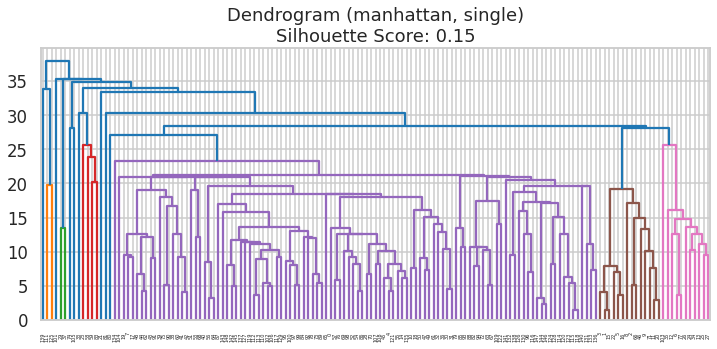

-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 4 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 3 , linkage methode : average , and affinity : cosine produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 5 , linkage methode : average , and affinity : cosine produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : average , and affinity : cosine produc

(0.6867350732769777,
 {'affinity': 'euclidean',
  'linkage': 'average',
  'distance_threshold': 3,
  'nuber of clusters': 2})

In [43]:
Agglomerative_clustering(iris_data.data,no_dendograms = False)
# The number of clusters is : 2 clusters with silhouette score : 0.69
# Affinity: manhattan, Linkage: average, Distance Threshold: 4
# Silhouette Score: 0.69
# 0    66.666667
# 1    33.333333

# Features relations

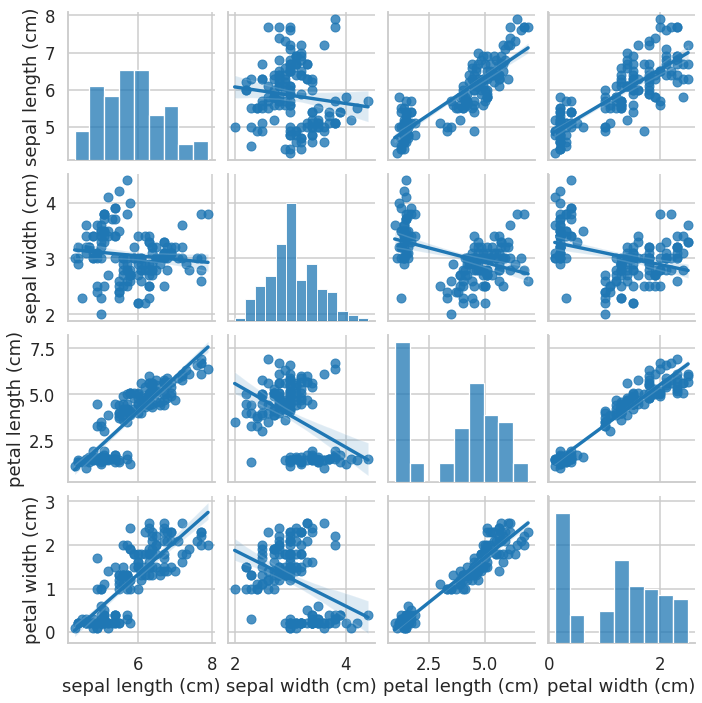

In [24]:
sns.pairplot(pd.DataFrame(iris_data.data,columns = iris_data.feature_names), kind="reg")
plt.show()

In [25]:
df = pd.DataFrame(iris_data.data,columns = iris_data.feature_names)
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris_data.data)

In [29]:
pca = PCA(n_components=3)
# prepare transform on dataset
pca.fit(iris_data.data)
# apply transform to dataset
transformed = pca.transform(iris_data.data)
data_3d = pd.DataFrame(transformed,columns = ["1",'2',"3"])
df = px.data.iris()
fig = px.scatter_3d(data_3d, x='1', y='2', z='3',
              color='3')
fig.show()

The number of clusters is : 2 clusters with silhouette score : 0.69
Affinity: euclidean, Linkage: average, Distance Threshold: 3
Silhouette Score: 0.69
0    66.666667
1    33.333333
dtype: float64


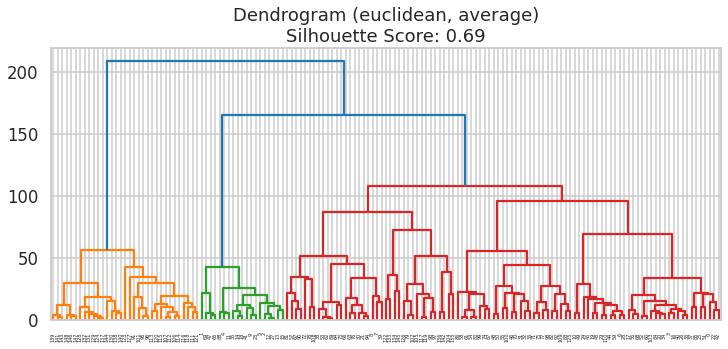

-----------------------------------------------------------------------------------------------------
distance threshold : 5 , linkage methode : average , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : average , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 9 clusters with silhouette score : 0.37
Affinity: euclidean, Linkage: average, Distance Threshold: 1
Silhouette Score: 0.37
0    32.666667
1    25.333333
6    15.333333
2    14.666667
3     6.000000
5     2.666667
8     2.000000
4     0.666667
7     0.666667
dtype: float64


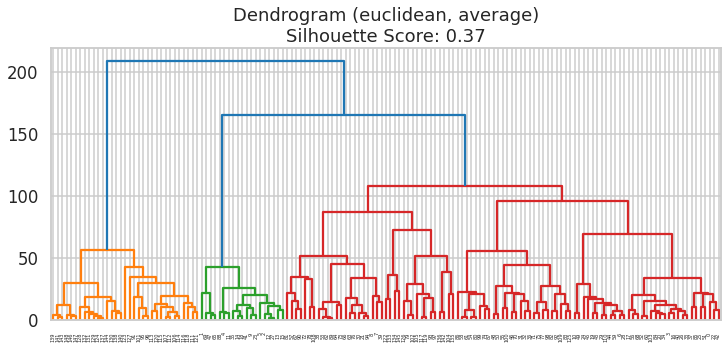

-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : average , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 2 clusters with silhouette score : 0.69
Affinity: euclidean, Linkage: average, Distance Threshold: 4
Silhouette Score: 0.69
0    66.666667
1    33.333333
dtype: float64


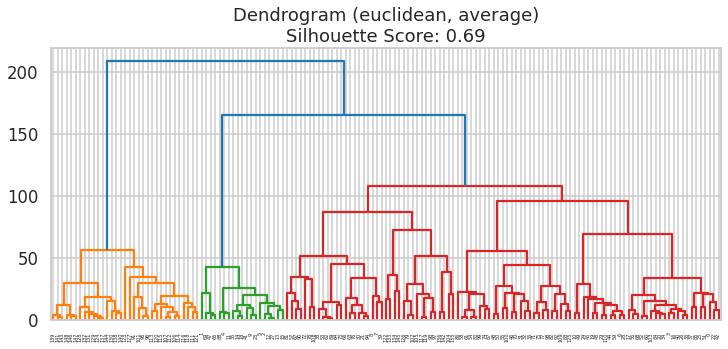

-----------------------------------------------------------------------------------------------------
distance threshold : 3 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 5 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 2 clusters with silhouette score : 0.69
Affinity: euclidean, Linkage: single, Distance Threshold: 1
Silhouette Score: 0.69
0    66.666667
1    33.333333
dtype: float64


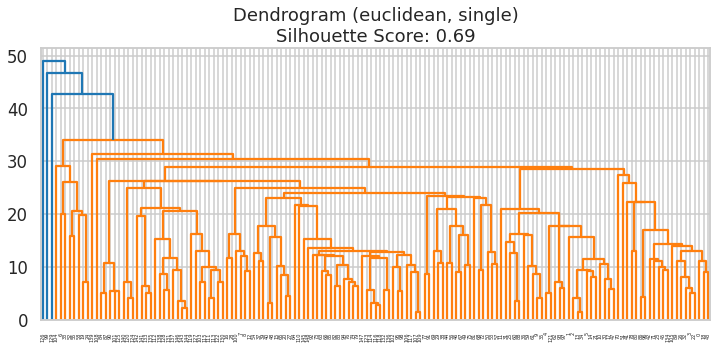

-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 4 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 3 clusters with silhouette score : 0.54
Affinity: manhattan, Linkage: average, Distance Threshold: 3
Silhouette Score: 0.54
0    58.666667
1    33.333333
2     8.000000
dtype: float64


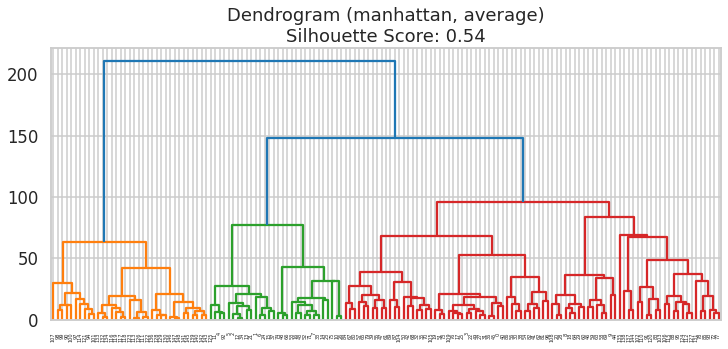

-----------------------------------------------------------------------------------------------------
distance threshold : 5 , linkage methode : average , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : average , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 19 clusters with silhouette score : 0.29
Affinity: manhattan, Linkage: average, Distance Threshold: 1
Silhouette Score: 0.29
17    18.666667
0     14.666667
3     14.000000
1     12.000000
7      9.333333
10     8.666667
6      4.000000
16     3.333333
9      2.666667
4      2.666667
15     2.000000
2      2.000000
8      1.333333
13     1.333333
5      0.666667
11     0.666667
12     0.666667
14     0.666667
18     0.666667
dtype: float64


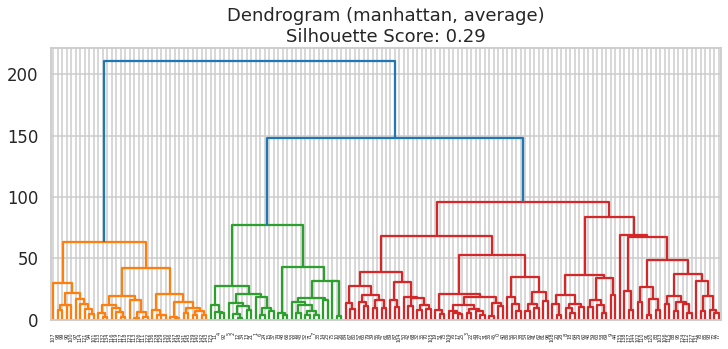

-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : average , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 2 clusters with silhouette score : 0.69
Affinity: manhattan, Linkage: average, Distance Threshold: 4
Silhouette Score: 0.69
0    66.666667
1    33.333333
dtype: float64


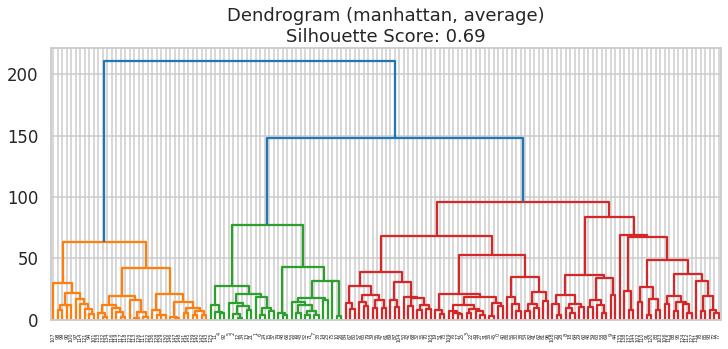

-----------------------------------------------------------------------------------------------------
distance threshold : 3 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 5 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 3 clusters with silhouette score : 0.52
Affinity: manhattan, Linkage: single, Distance Threshold: 1
Silhouette Score: 0.52
0    65.333333
1    33.333333
2     1.333333
dtype: float64


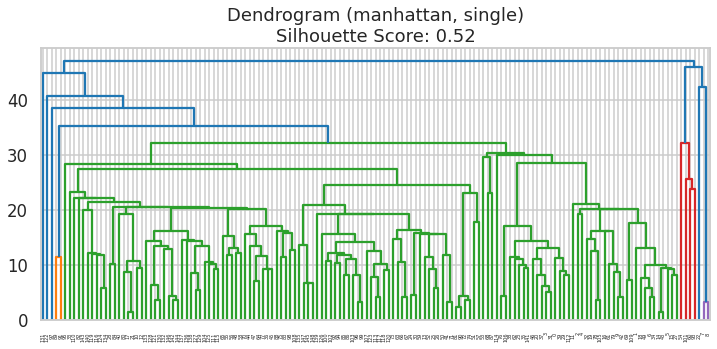

-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 4 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 3 , linkage methode : average , and affinity : cosine produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 5 , linkage methode : average , and affinity : cosine produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : average , and affinity : cosine produc

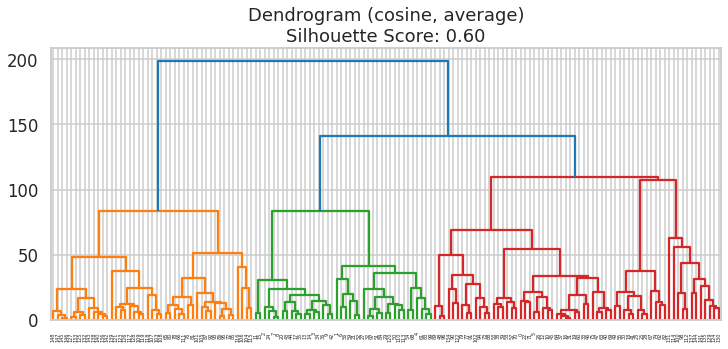

-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : average , and affinity : cosine produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 4 , linkage methode : average , and affinity : cosine produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 3 , linkage methode : single , and affinity : cosine produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 5 , linkage methode : single , and affinity : cosine produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : single , and affinity : cosine produces only

(0.692612946075623,
 {'affinity': 'euclidean',
  'linkage': 'average',
  'distance_threshold': 3,
  'nuber of clusters': 2})

In [42]:
Agglomerative_clustering(data_3d,no_dendograms = False)
# The number of clusters is : 2 clusters with silhouette score : 0.69
# Affinity: euclidean, Linkage: average, Distance Threshold: 3
# Silhouette Score: 0.69
# 0    66.666667
# 1    33.333333

In [32]:
pca = PCA(n_components=2)
# prepare transform on dataset
pca.fit(iris_data.data)
# apply transform to dataset
transformed = pca.transform(iris_data.data)
data_2d = pd.DataFrame(transformed,columns = ["1",'2'])
df = px.data.iris()
fig = px.scatter(data_2d,x = "1",y = "2",
              color='2')
fig.show()

The number of clusters is : 2 clusters with silhouette score : 0.71
Affinity: euclidean, Linkage: average, Distance Threshold: 3
Silhouette Score: 0.71
0    66.666667
1    33.333333
dtype: float64


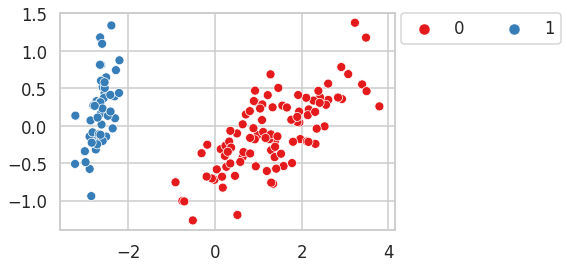

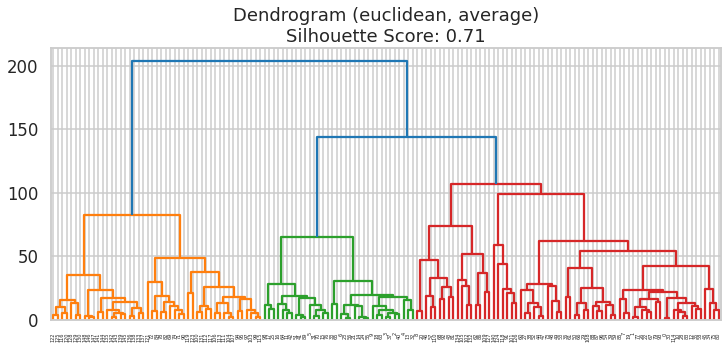

-----------------------------------------------------------------------------------------------------
distance threshold : 5 , linkage methode : average , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : average , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 7 clusters with silhouette score : 0.44
Affinity: euclidean, Linkage: average, Distance Threshold: 1
Silhouette Score: 0.44
0    31.333333
3    24.000000
1    17.333333
6    16.666667
2     6.000000
4     2.666667
5     2.000000
dtype: float64


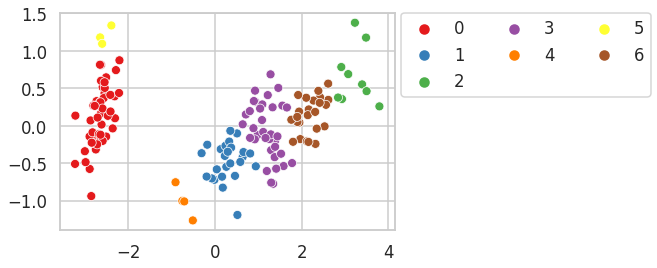

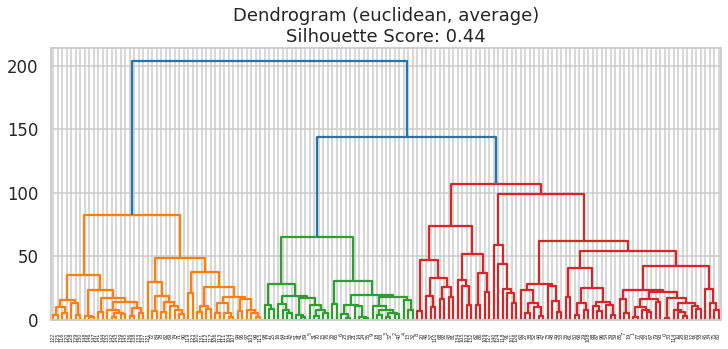

-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : average , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 2 clusters with silhouette score : 0.71
Affinity: euclidean, Linkage: average, Distance Threshold: 4
Silhouette Score: 0.71
0    66.666667
1    33.333333
dtype: float64


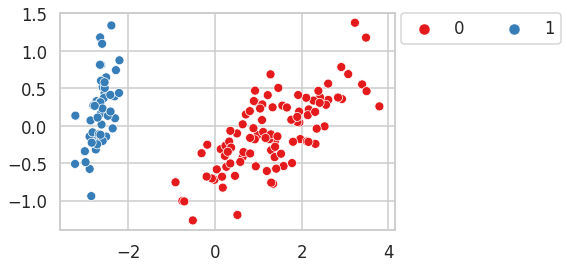

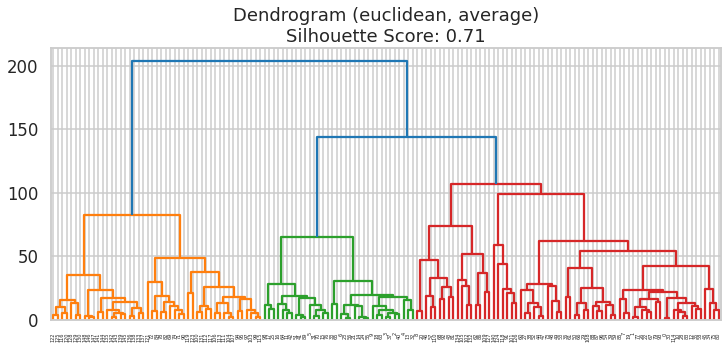

-----------------------------------------------------------------------------------------------------
distance threshold : 3 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 5 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 2 clusters with silhouette score : 0.71
Affinity: euclidean, Linkage: single, Distance Threshold: 1
Silhouette Score: 0.71
0    66.666667
1    33.333333
dtype: float64


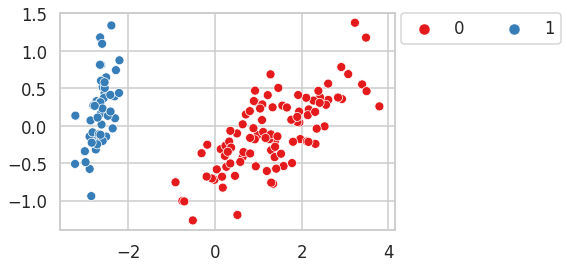

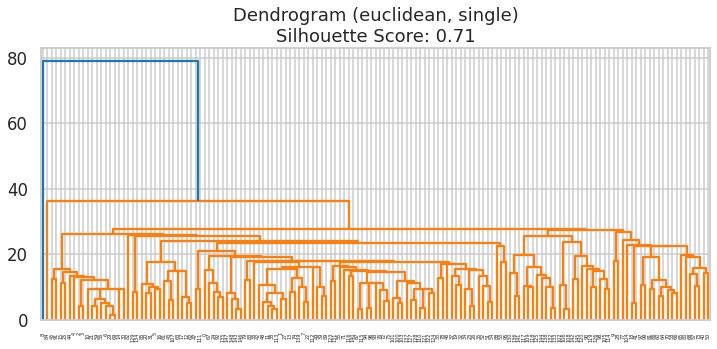

-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 4 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 2 clusters with silhouette score : 0.71
Affinity: manhattan, Linkage: average, Distance Threshold: 3
Silhouette Score: 0.71
0    66.666667
1    33.333333
dtype: float64


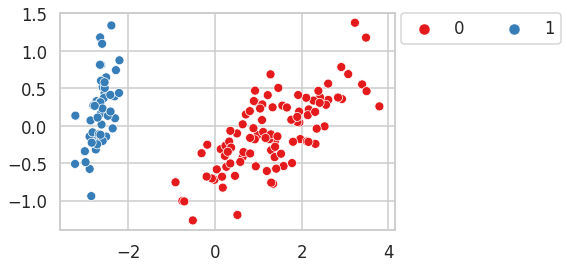

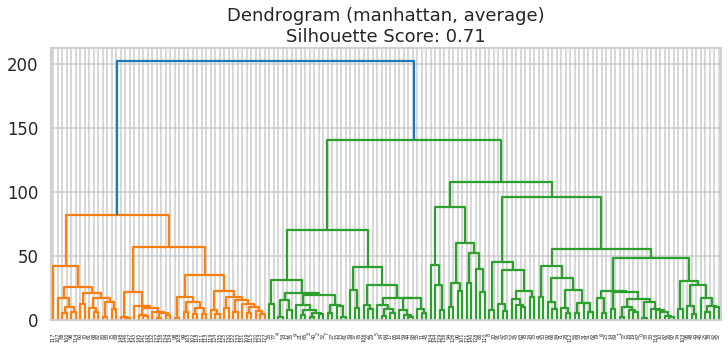

-----------------------------------------------------------------------------------------------------
distance threshold : 5 , linkage methode : average , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : average , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 11 clusters with silhouette score : 0.36
Affinity: manhattan, Linkage: average, Distance Threshold: 1
Silhouette Score: 0.36
1     28.000000
0     22.000000
3     16.666667
7     14.666667
2      6.666667
8      4.666667
4      2.666667
10     2.000000
6      1.333333
5      0.666667
9      0.666667
dtype: float64


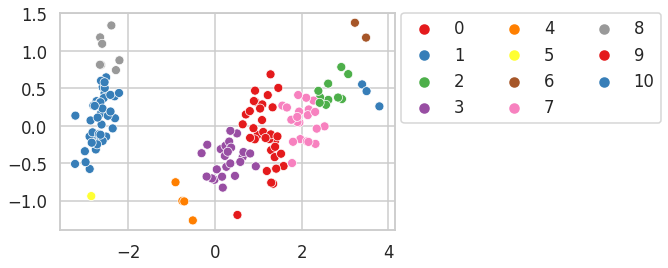

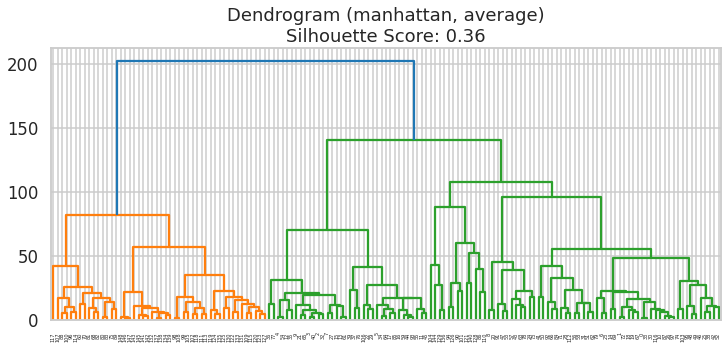

-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : average , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 2 clusters with silhouette score : 0.71
Affinity: manhattan, Linkage: average, Distance Threshold: 4
Silhouette Score: 0.71
0    66.666667
1    33.333333
dtype: float64


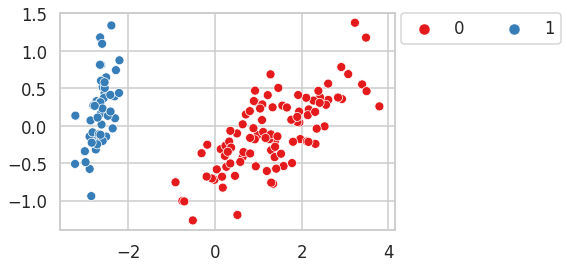

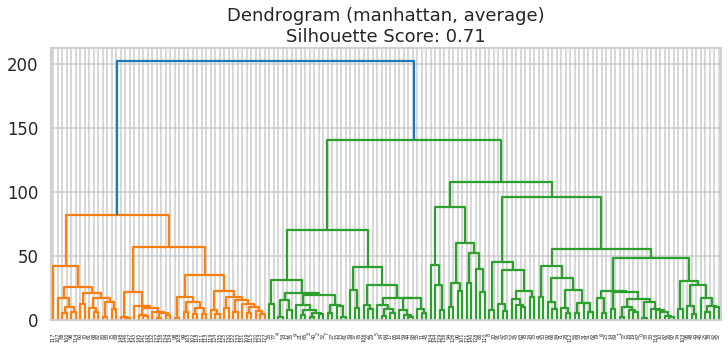

-----------------------------------------------------------------------------------------------------
distance threshold : 3 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 5 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 2 clusters with silhouette score : 0.71
Affinity: manhattan, Linkage: single, Distance Threshold: 1
Silhouette Score: 0.71
0    66.666667
1    33.333333
dtype: float64


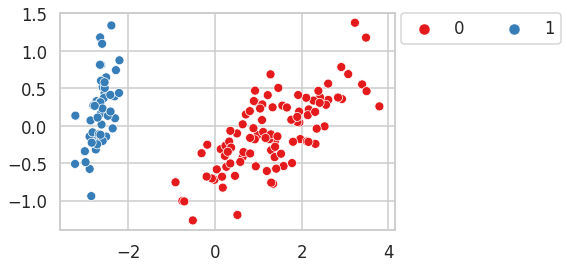

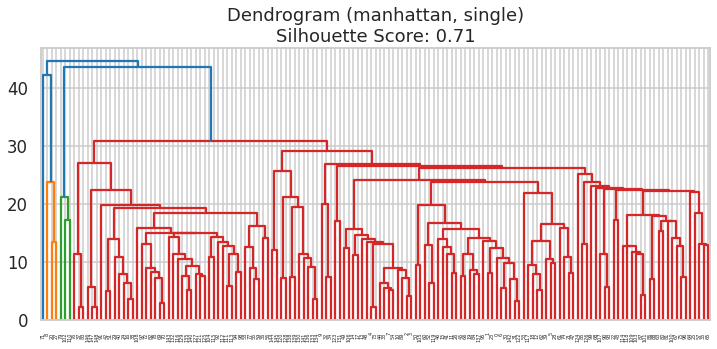

-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 4 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 3 , linkage methode : average , and affinity : cosine produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 5 , linkage methode : average , and affinity : cosine produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : average , and affinity : cosine produc

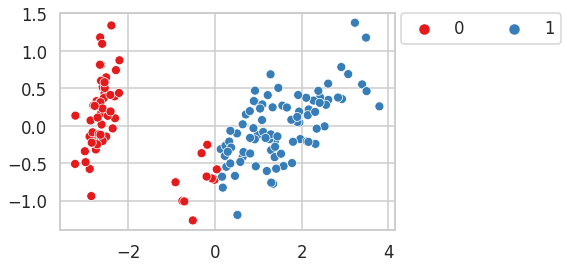

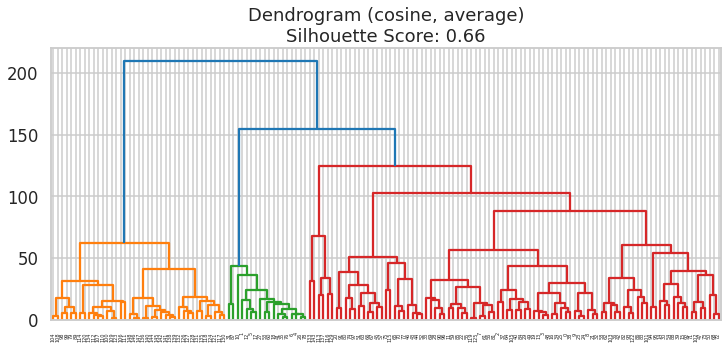

-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : average , and affinity : cosine produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 4 , linkage methode : average , and affinity : cosine produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 3 , linkage methode : single , and affinity : cosine produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 5 , linkage methode : single , and affinity : cosine produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : single , and affinity : cosine produces only

(0.711235373323721,
 {'affinity': 'euclidean',
  'linkage': 'average',
  'distance_threshold': 3,
  'nuber of clusters': 2})

In [41]:
Agglomerative_clustering(data_2d.values,no_dendograms = False)
# The number of clusters is : 2 clusters with silhouette score : 0.71
# Affinity: euclidean, Linkage: average, Distance Threshold: 3
# Silhouette Score: 0.71
# 0    66.666667
# 1    33.333333

## Customer dataset
Repeat all the above on the customer data set 

In [4]:
df_Customer = pd.read_csv("/content/Customer data.csv",index_col = "ID")

In [5]:
df_Customer.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [6]:
df_Customer.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [7]:
df_Customer.nunique()

Sex                   2
Marital status        2
Age                  58
Education             4
Income             1982
Occupation            3
Settlement size       3
dtype: int64

not all features have the same scale 

In [8]:
scaler = StandardScaler()
# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(df_Customer)

distance threshold : 9 , linkage methode : average , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 15 , linkage methode : average , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 20 , linkage methode : average , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 30 , linkage methode : average , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 40 , linkage methode : average , and affinity : euclidean produces only one cluster
--------------------------------------------------------------------

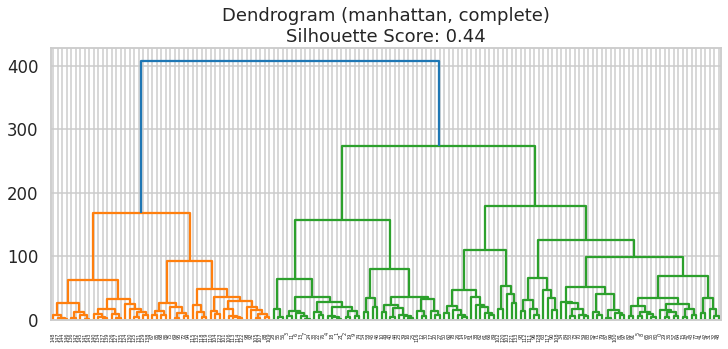

-----------------------------------------------------------------------------------------------------
distance threshold : 15 , linkage methode : complete , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 20 , linkage methode : complete , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 30 , linkage methode : complete , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 40 , linkage methode : complete , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : average , and affinity 

(0.43501182441265085,
 {'affinity': 'manhattan',
  'linkage': 'complete',
  'distance_threshold': 9,
  'nuber of clusters': 3})

In [40]:
Agglomerative_clustering(scaled_data, linkages = ['average', 'single', 'complete'], distance_thresholds = [9,15,20,30,40], no_dendograms = False)
# The number of clusters is : 3 clusters with silhouette score : 0.44
# Affinity: manhattan, Linkage: complete, Distance Threshold: 9
# Silhouette Score: 0.44
# 0    48.666667
# 1    33.333333
# 2    18.000000